###📊 Week 3 – Project 1
Exploratory Data Analysis (EDA) on the Titanic Dataset

Exploratory Data Analysis (EDA) is a fundamental step in data analysis that helps in understanding the structure, patterns, relationships, and anomalies present in a dataset. It allows analysts to summarize the main characteristics of data using both statistical methods and visualizations.

In this project, we perform an in-depth exploratory data analysis on the Titanic dataset, which contains information about passengers who were aboard the RMS Titanic during its maiden voyage in 1912. The dataset includes passenger demographics, travel class, ticket fare, age, gender, family details, and survival status.

The objective of this analysis is to study survival patterns and identify the key factors that influenced passenger survival. By applying data cleaning, feature engineering, and visualization techniques, this project demonstrates how meaningful insights can be extracted from real-world datasets and prepares the data for further machine learning tasks.

###🎯 Objectives of the Project

The primary objective of this project is to perform exploratory data analysis on the Titanic dataset in order to understand the factors that influenced passenger survival during the disaster. Through systematic analysis and visualization, this project aims to extract meaningful insights from the data.

The specific objectives of this project are:

To load and explore the structure of the Titanic dataset.

To identify and analyze missing values in the dataset.

To perform data cleaning using appropriate statistical techniques.

To engineer new features that enhance analytical and predictive power.

To analyze survival patterns based on key variables such as gender, passenger class, and age.

To visualize relationships between different features using appropriate plots.

To prepare a clean and structured dataset suitable for further machine learning tasks.

###📁 Dataset Description: Titanic Dataset

The Titanic dataset contains detailed information about passengers who traveled aboard the RMS Titanic. This dataset is widely used for learning data analysis and machine learning concepts due to its combination of numerical and categorical features.

Each row in the dataset represents an individual passenger, and the columns describe personal details, travel information, and survival status. The dataset provides a real-world scenario for understanding how different factors influence outcomes in a classification problem.

The dataset used in this project is obtained from the Kaggle competition “Titanic: Machine Learning from Disaster”, and the train.csv file is used for exploratory data analysis.

🔢 Numerical Features

PassengerId: Unique identifier assigned to each passenger

Age: Age of the passenger

Fare: Ticket fare paid by the passenger

SibSp: Number of siblings or spouses aboard the Titanic

Parch: Number of parents or children aboard the Titanic

🏷️ Categorical Features

Survived: Survival status (0 = Did not survive, 1 = Survived)

Pclass: Passenger class (1 = First, 2 = Second, 3 = Third)

Sex: Gender of the passenger

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Ticket: Ticket number

Cabin: Cabin number

🧰 Environment Setup & Library Imports

Before starting the exploratory data analysis, the Python environment is prepared by importing the required libraries. These libraries are essential for data manipulation, numerical computation, and data visualization.

Warnings are suppressed to maintain a clean output, and Seaborn’s default style is set to improve the visual appearance of plots throughout the analysis.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set seaborn style for better visuals
sns.set_style('whitegrid')

📦 Dataset Extraction (ZIP File Handling)

The Titanic dataset downloaded from Kaggle is provided in a compressed ZIP format. Before loading the data for analysis, the contents of the ZIP file must be extracted so that the CSV files can be accessed.

In this step, Python’s built-in zipfile module is used to extract all files from the downloaded ZIP archive into a separate directory. Organizing extracted files into a dedicated folder helps maintain a clean project structure.

In [12]:
import zipfile

# Path to the downloaded ZIP file
zip_path = "titanic.zip"   # change name if your ZIP file name is different

# Extract all files into a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

###📁 Loading the Titanic Dataset

After extracting the dataset files from the ZIP archive, the next step is to load the Titanic dataset into the Python environment. The dataset is stored in CSV format, which allows it to be easily read and processed using the Pandas library.

For exploratory data analysis, the train.csv file is used because it contains the Survived column, which is essential for analyzing survival patterns.

In [13]:
# Load the Titanic training dataset
df = pd.read_csv("titanic_data/train.csv")

# Display the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


🔍 Dataset Overview and Structure

Once the dataset is successfully loaded, it is important to understand its overall structure. This includes examining the number of rows and columns, identifying the available features, and reviewing the data types of each column.

This step helps in distinguishing between numerical and categorical variables and provides insight into the completeness of the dataset before proceeding with deeper analysis.

In [14]:
# Display dataset shape
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumn Names:")
print(df.columns)

# Display dataset information
print("\n--- Dataset Information ---")
df.info()

Dataset Shape: (891, 12)

Column Names:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###❗ Missing Values Analysis

Real-world datasets often contain missing values that can affect the accuracy and reliability of analysis. Identifying and understanding missing data is an essential step before performing data cleaning or visualization.

In this step, the total number of missing values in each column of the Titanic dataset is calculated. This helps in identifying which features require special handling or imputation in later stages of the analysis.

In [15]:
# Count missing values in each column
print("\n--- Missing Values Count ---")
df.isnull().sum()


--- Missing Values Count ---


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


###📊 Visualizing Missing Values

While numerical summaries provide the count of missing values, visualizing missing data helps in understanding their distribution across the dataset. A heatmap offers a clear and intuitive way to identify columns with a high proportion of missing values.

This visualization highlights patterns of missing data and helps in deciding appropriate data cleaning strategies. In this project, a color-coded heatmap is used to clearly distinguish between present and missing values, and the figure is saved for documentation and reporting purposes.

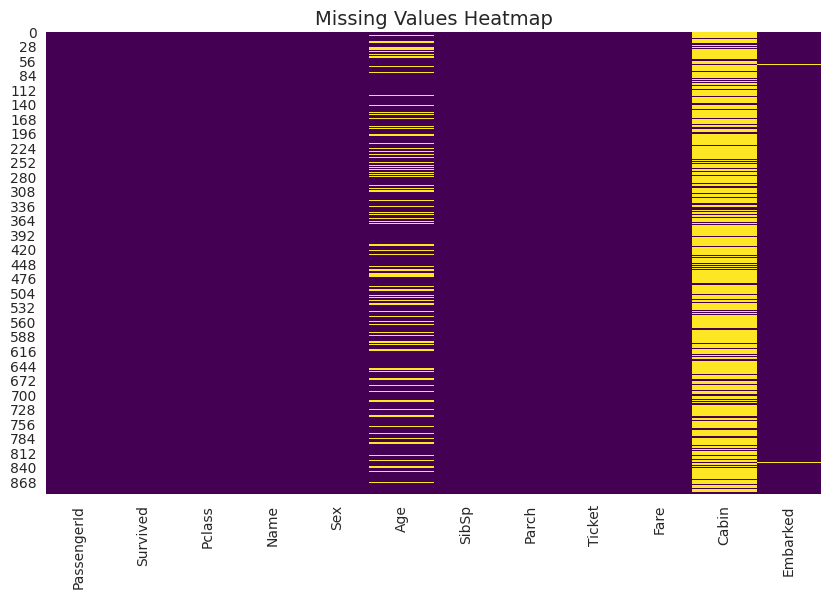

In [16]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap with professional color palette
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap="viridis"
)

# Add title
plt.title("Missing Values Heatmap", fontsize=14)

# Save the figure
plt.savefig("missing_values_heatmap.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()

###🧹 Advanced Data Cleaning

Real-world datasets often contain missing values and redundant features that can negatively impact analysis and modeling. Instead of simply dropping rows or columns with missing data, this project applies statistical imputation techniques based on the distribution and importance of each feature.

Numerical features are handled using robust statistics to minimize the influence of outliers, while categorical features are imputed using the most frequent category. Additionally, columns with excessive missing values are transformed into more meaningful features rather than being completely discarded.

This approach helps preserve valuable information and ensures the dataset remains suitable for exploratory analysis and machine learning tasks.

In [17]:
# Handle 'Age' - Impute using median to avoid outlier influence
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle 'Embarked' - Impute using the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Handle 'Cabin' - Create a binary feature indicating cabin availability
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Drop high-cardinality and less informative columns
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

# Extract passenger title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Drop Name column after extracting title
df.drop(columns=['Name'], inplace=True)

In [18]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
HasCabin,0


In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'HasCabin', 'Title'],
      dtype='object')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr


In [21]:
print("Data cleaning completed successfully.")

Data cleaning completed successfully.


###🧠 Feature Engineering

Feature engineering enhances the dataset by creating new variables that capture meaningful patterns not directly available in the raw data. These engineered features help improve interpretability and can provide better predictive power in analytical and machine learning tasks.

In this project, family-related features are created to study the impact of traveling alone versus with family members. Redundant columns are also removed to reduce multi-collinearity and simplify the dataset structure

In [22]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Categorize passengers based on family size
def segment_family(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

df['FamilyGroup'] = df['FamilySize'].apply(segment_family)

# Drop redundant columns
df.drop(columns=['SibSp', 'Parch', 'PassengerId'], inplace=True)

In [23]:
df[['FamilySize', 'FamilyGroup']].head()

,FamilySize,FamilyGroup
0,2,Small
1,2,Small
2,1,Alone
3,2,Small
4,1,Alone


###📊 Deep-Dive Exploratory Analysis (Visuals)

After cleaning and feature engineering, we analyze relationships between key variables to understand survival patterns. Visualizations help reveal how gender, passenger class, and age interact with survival outcomes. All plots are styled professionally and saved for reporting.

###1️⃣ Survival Rate by Passenger Class and Gender

This visualization compares survival probability across passenger classes while differentiating by gender.

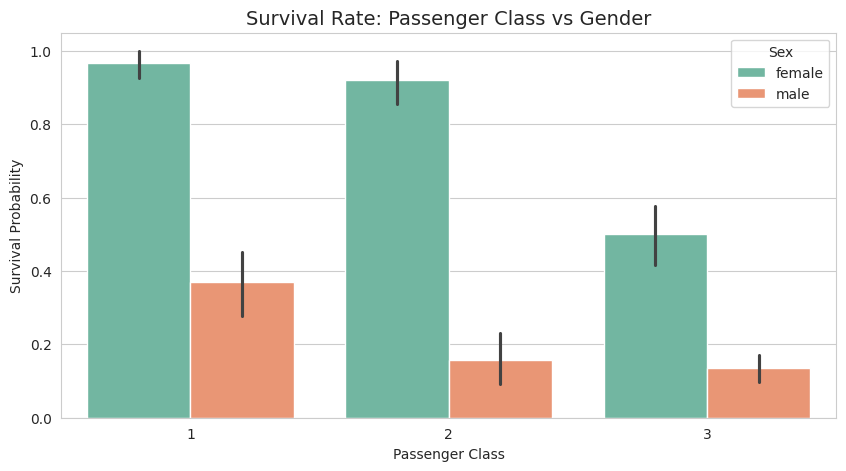

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=df,
    palette='Set2'
)
plt.title('Survival Rate: Passenger Class vs Gender', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')

plt.savefig('survival_by_class_and_gender.png', dpi=300, bbox_inches='tight')
plt.show()

🎻 Survival Analysis Using Violin and Box Plot (Age vs Survival)

While bar charts show overall survival rates, violin and box plots provide deeper insight into the distribution and spread of age across survival categories. This visualization helps compare age ranges, medians, and density patterns between passengers who survived and those who did not.

Combining violin and box plots allows us to observe both the distribution shape and key statistical summaries in a single visualization.

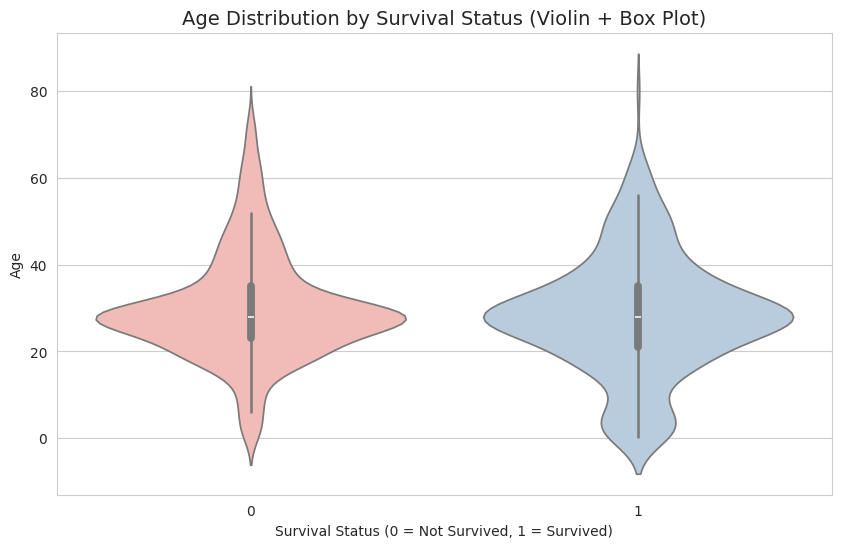

In [37]:
# Set figure size
plt.figure(figsize=(10, 6))

# Violin plot with box plot inside
sns.violinplot(
    x='Survived',
    y='Age',
    data=df,
    inner='box',
    palette='Pastel1'
)

# Labels and title
plt.title('Age Distribution by Survival Status (Violin + Box Plot)', fontsize=14)
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Age')

# Save the plot
plt.savefig('age_vs_survival_violin_boxplot.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

###2️⃣ Age Distribution by Survival Status

This plot compares the age distribution of passengers who survived vs those who did not.

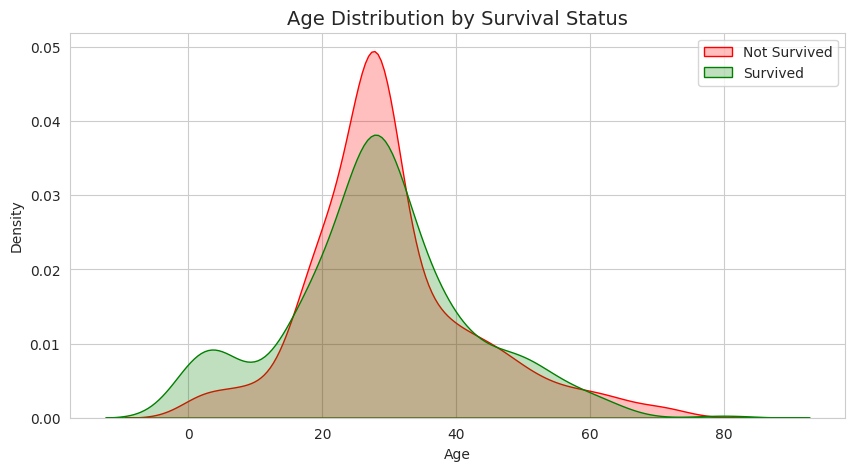

In [25]:
plt.figure(figsize=(10, 5))

sns.kdeplot(
    df[df['Survived'] == 0]['Age'],
    fill=True,
    label='Not Survived',
    color='red'
)
sns.kdeplot(
    df[df['Survived'] == 1]['Age'],
    fill=True,
    label='Survived',
    color='green'
)

plt.title('Age Distribution by Survival Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.savefig('age_distribution_by_survival.png', dpi=300, bbox_inches='tight')
plt.show()

###3️⃣ Correlation Heatmap of Numerical Features

This heatmap shows how numerical features correlate with survival and with each other.

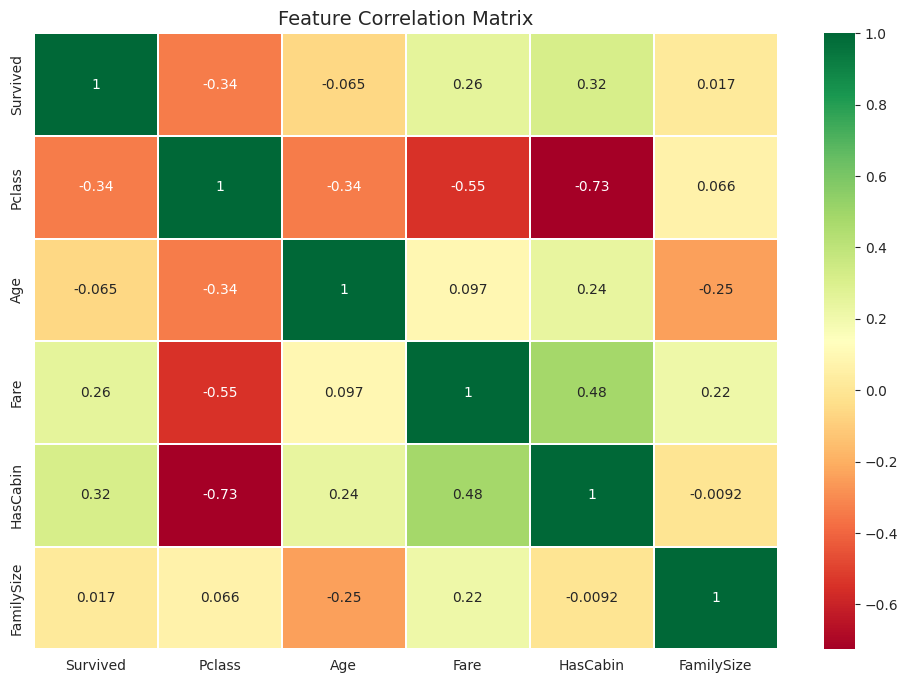

In [26]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='RdYlGn',
    linewidths=0.2
)

plt.title('Feature Correlation Matrix', fontsize=14)

plt.savefig('feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

###🔢 Categorical Encoding (Preparing Data for Modeling)

Machine learning algorithms cannot directly process categorical (text-based) data. Therefore, categorical features must be converted into numerical format. In this step, One-Hot Encoding is applied to transform categorical variables into binary indicator columns.

Before encoding, rare passenger titles are grouped together to reduce noise and improve model generalization. To avoid the dummy variable trap, the first category in each encoded feature is dropped.

In [27]:
# Group rare titles to reduce noise
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
     'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
    'Rare'
)

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# One-Hot Encoding categorical features
df_final = pd.get_dummies(
    df,
    columns=['Sex', 'Embarked', 'FamilyGroup', 'Title'],
    drop_first=True
)

# Display final dataset shape and preview
print("Final DataFrame Shape:", df_final.shape)
df_final.head()

Final DataFrame Shape: (891, 15)


,Survived,Pclass,Age,Fare,HasCabin,FamilySize,Sex_male,Embarked_Q,Embarked_S,FamilyGroup_Large,FamilyGroup_Small,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,0,2,True,False,True,False,True,False,True,False,False
1,1,1,38.0,71.2833,1,2,False,False,False,False,True,False,False,True,False
2,1,3,26.0,7.9250,0,1,False,False,True,False,False,True,False,False,False
3,1,1,35.0,53.1000,1,2,False,False,True,False,True,False,False,True,False
4,0,3,35.0,8.0500,0,1,True,False,True,False,False,False,True,False,False


In [28]:
type(df_final)

pandas.core.frame.DataFrame

In [29]:
print("Before Encoding Shape:", df.shape)
print("After Encoding Shape:", df_final.shape)

Before Encoding Shape: (891, 10)
After Encoding Shape: (891, 15)


In [30]:
df[['Sex', 'Embarked', 'FamilyGroup', 'Title']].head()

,Sex,Embarked,FamilyGroup,Title
0,male,S,Small,Mr
1,female,C,Small,Mrs
2,female,S,Alone,Miss
3,female,S,Small,Mrs
4,male,S,Alone,Mr


In [32]:
[col for col in df_final.columns if col.startswith('Sex_')]

['Sex_male']

In [33]:
[col for col in df_final.columns if col.startswith('Embarked_')]
[col for col in df_final.columns if col.startswith('FamilyGroup_')]
[col for col in df_final.columns if col.startswith('Title_')]

['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

In [34]:
df_final.dtypes

,0
Survived,int64
Pclass,int64
Age,float64
Fare,float64
HasCabin,int64
FamilySize,int64
Sex_male,bool
Embarked_Q,bool
Embarked_S,bool
FamilyGroup_Large,bool


In [35]:
df_final.head()

,Survived,Pclass,Age,Fare,HasCabin,FamilySize,Sex_male,Embarked_Q,Embarked_S,FamilyGroup_Large,FamilyGroup_Small,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,22.0,7.2500,0,2,True,False,True,False,True,False,True,False,False
1,1,1,38.0,71.2833,1,2,False,False,False,False,True,False,False,True,False
2,1,3,26.0,7.9250,0,1,False,False,True,False,False,True,False,False,False
3,1,1,35.0,53.1000,1,2,False,False,True,False,True,False,False,True,False
4,0,3,35.0,8.0500,0,1,True,False,True,False,False,False,True,False,False


###📝 Final Insight Report

Key Insights from the Titanic Dataset EDA:

Female passengers had a significantly higher survival rate compared to male passengers.

Passengers traveling in first class showed much higher survival probabilities than those in second and third class.

Younger passengers, especially children, had better survival chances compared to older age groups.

Passengers traveling alone had lower survival rates than those traveling with small families.

Socio-economic status and gender were stronger indicators of survival than age alone.

###📝 Project Summary

This project performed a comprehensive exploratory data analysis on the Titanic dataset to understand the factors that influenced passenger survival during the disaster. The analysis began with dataset loading, structural inspection, and identification of missing values, followed by appropriate data cleaning and statistical imputation techniques.

Feature engineering was applied to enhance the dataset by creating meaningful variables such as family size, family group, cabin availability, and passenger titles. These engineered features helped capture real-world social and behavioral patterns present in the data.

Survival patterns were analyzed using multiple visualizations, including bar charts, distribution plots, heatmaps, and violin-box plots. The results showed that gender and passenger class played a significant role in survival outcomes, with women and first-class passengers having higher survival probabilities. Age distribution analysis revealed better survival chances for younger passengers, particularly children.

Overall, this project demonstrates how exploratory data analysis, combined with thoughtful data cleaning and feature engineering, can transform raw data into meaningful insights and prepare it for further predictive modeling tasks.